# Homework 5: Neural Network
### Instructor - Dr. Uma Gajendragadkar
### Sharon Lynch Grey - June 8, 2025
*Rob Taylor is my programming partner. We help each other with issues, but do not share code.*

**Problem** - Design and develop a Machine learning model for ANN based customer Churn Prediction using simple neural network.

**Dataset** - Churn dataset

The churn dataset is made up of 7043 rows (customers) and 21 columns (features). Each row represents a customer, each column contains customer’s attributes.

The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### UPDATED: June 16 - Added additional plotting in Evaluation
* Classification Report
* Confusion Matrix
* ROC Curve

## Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix, f1_score, roc_curve, auc
#from sklearn.metrics import classification_report
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import f1_score


import tensorflow.keras as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

## Data Exploration

In [73]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Get Information About Dataset

In [74]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Display First 5 Rows of Dataset

In [75]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Find Unique Values for Each Column in Dataset

In [76]:
unique_values = {col: churn_df[col].unique() for col in churn_df.columns}

for col, unique in unique_values.items():
    print(f"{col}: {unique}")        

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

### Get counts of Churn Yes/No

In [77]:
churn_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Data Preprocessing

### Clean Data

In [78]:
# drop customerID column as that is unrelated to whether a customer would churn
churn_df = churn_df.drop(['customerID'], axis = 1)

### Find and Handle Missing Values

In [79]:
# find na values
na_values = churn_df[churn_df.isna().any(axis=1)]
# return list of na values
na_list = na_values.values.flatten().tolist()
# print list of na values
na_list

[]

### Convert Categorical Values to Numeric

In [80]:
# encode all the columns with LabelEncoder
le = LabelEncoder()
for column in churn_df.columns:
    churn_df[column] = le.fit_transform(churn_df[column])

In [81]:
# display first 5 rows of dataset
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


## Investigate Data

### Find Unique Values for Each Column in Dataset

In [82]:
unique_values = {col: churn_df[col].unique() for col in churn_df.columns}

for col, unique in unique_values.items():
    print(f"{col}: {unique}")   

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
MonthlyCharges: [142 498 436 ... 594 289 874]
TotalCharges: [2505 1466  157 ... 2994 2660 5407]
Churn: [0 1]


## Plot Churn with other Features

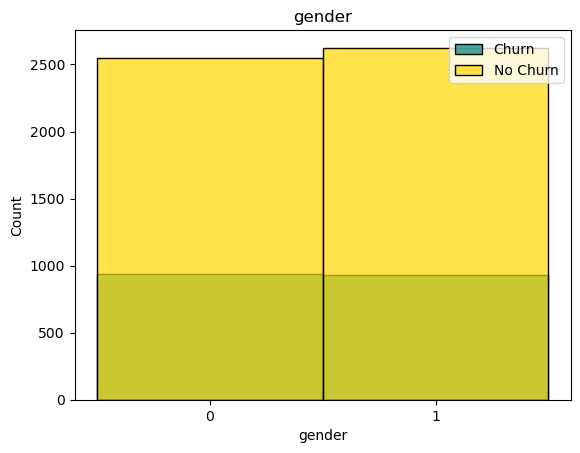

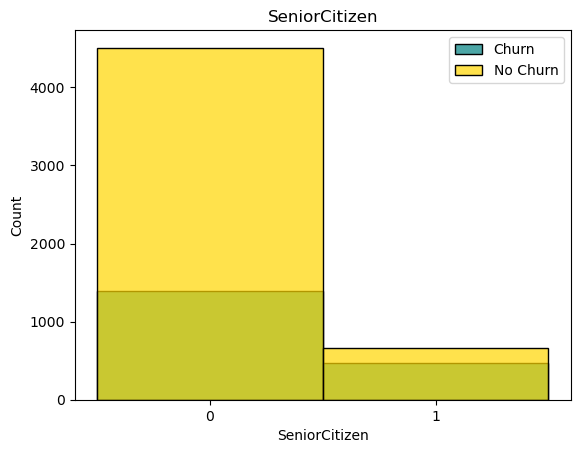

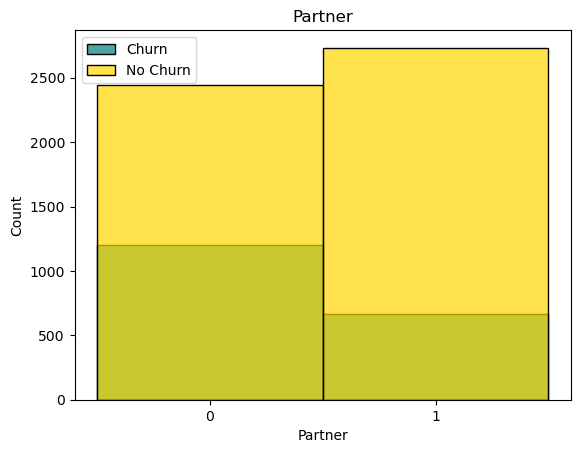

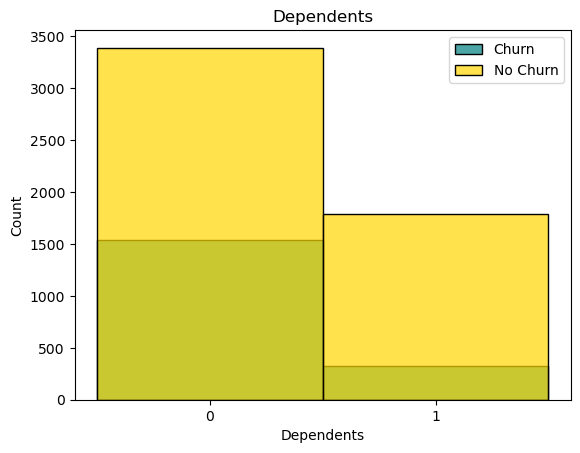

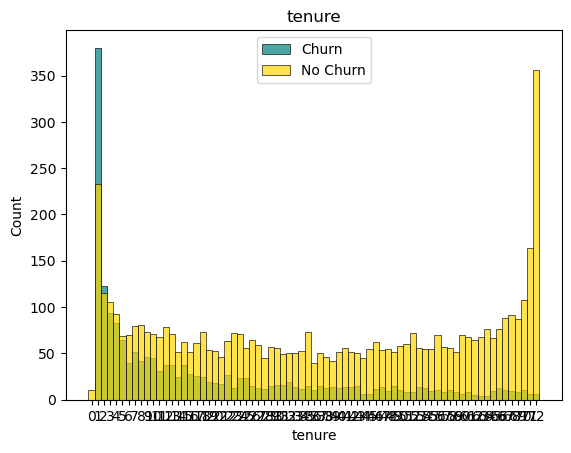

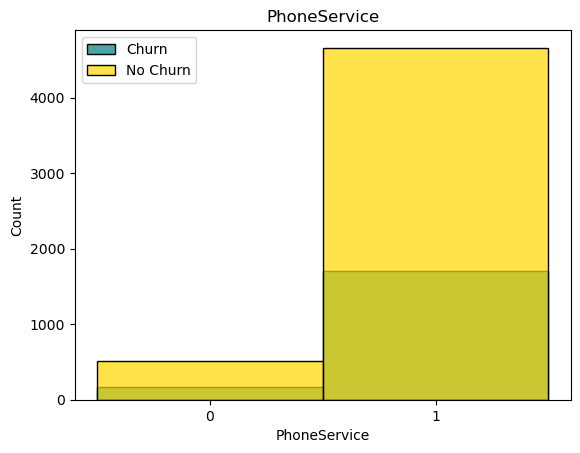

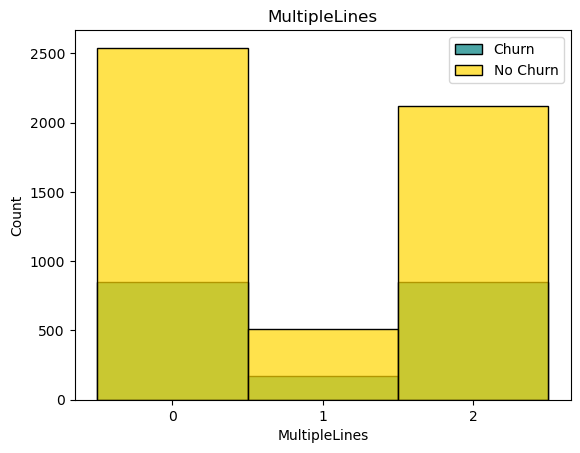

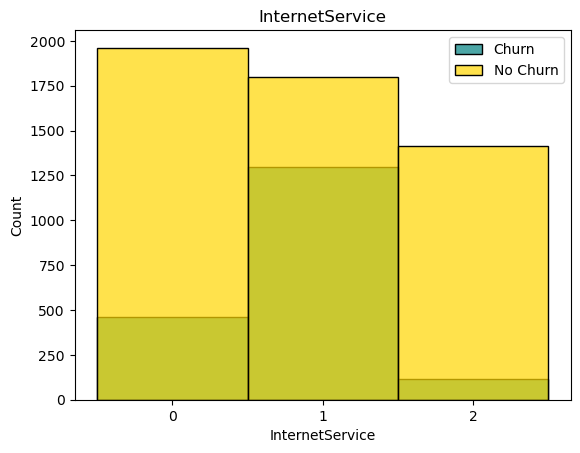

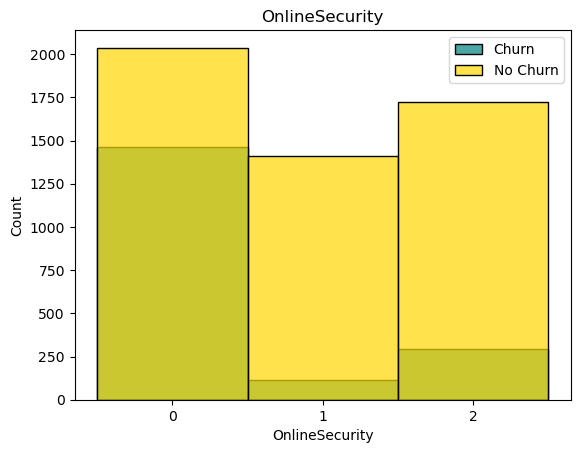

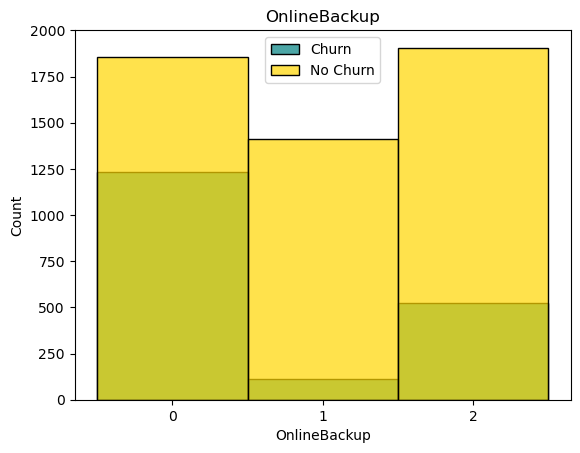

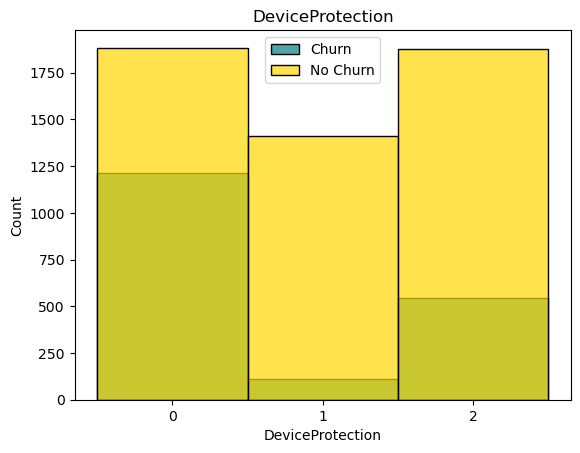

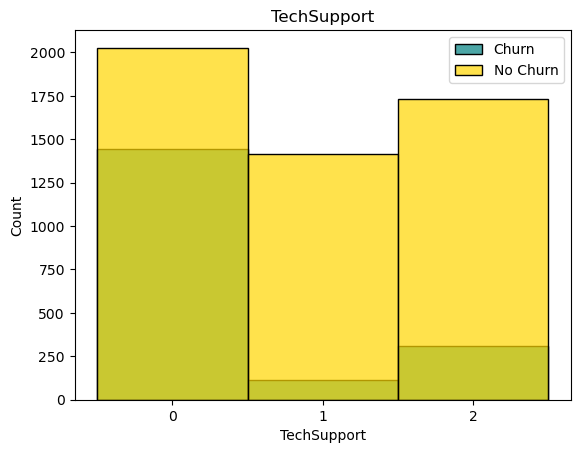

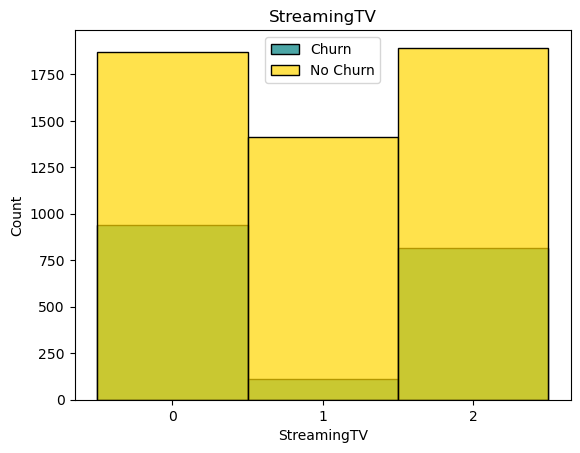

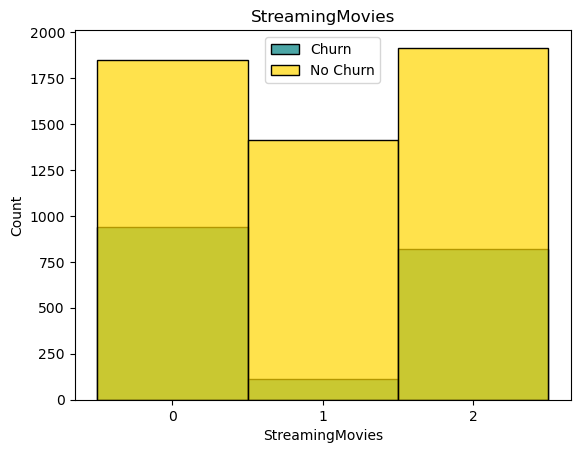

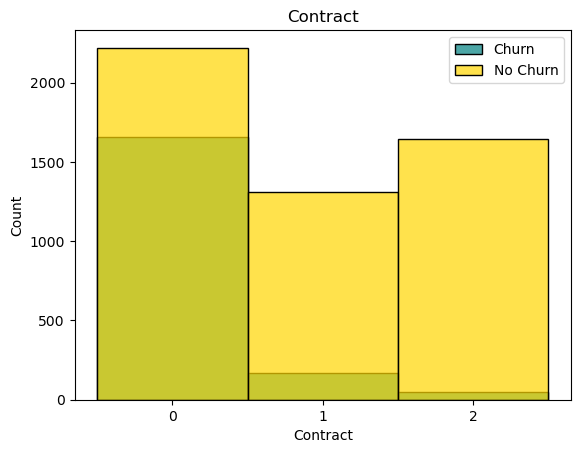

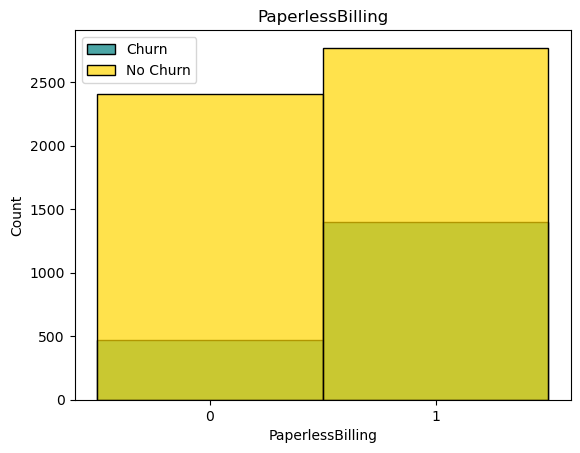

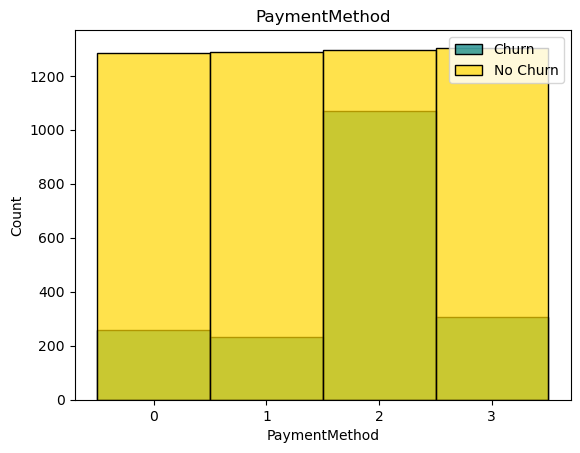

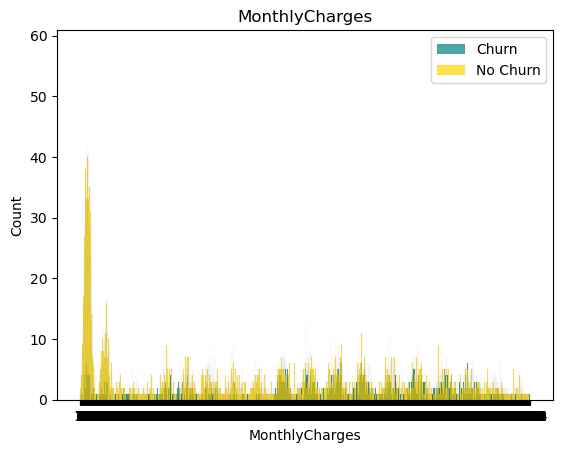

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


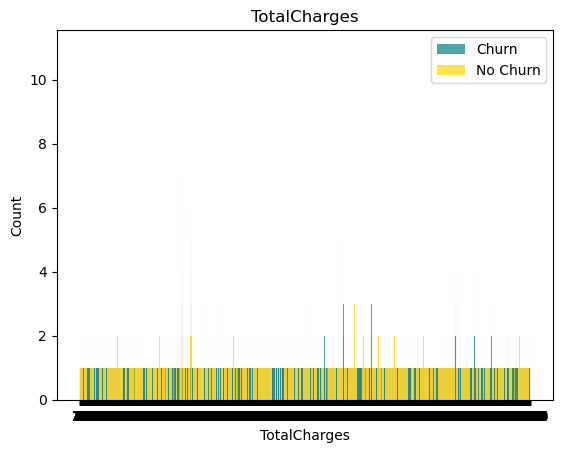

In [83]:
for i in range(len(churn_df.columns[:-1])):
    label = churn_df.columns[i]

    # get the number of unique valuse in the column to create appropriate number of bins
    num_bins = churn_df[label].nunique()

    # plot histograms for Churn and No Churn
    sns.histplot(churn_df[churn_df['Churn']==1][label], color='teal', label='Churn', alpha=0.7, bins=num_bins, discrete=True)
    sns.histplot(churn_df[churn_df['Churn']==0][label], color='gold', label='No Churn', alpha=0.7, bins=num_bins, discrete=True)
    plt.title(label)
    plt.ylabel('Count')
    plt.xlabel(label)

    # set x-axis to ticks and labels at center of bars
    unique_vals = sorted(churn_df[label].unique())
    plt.xticks(unique_vals)
    
    plt.legend()
    plt.show()

### Create Correlation Matrix

<Axes: >

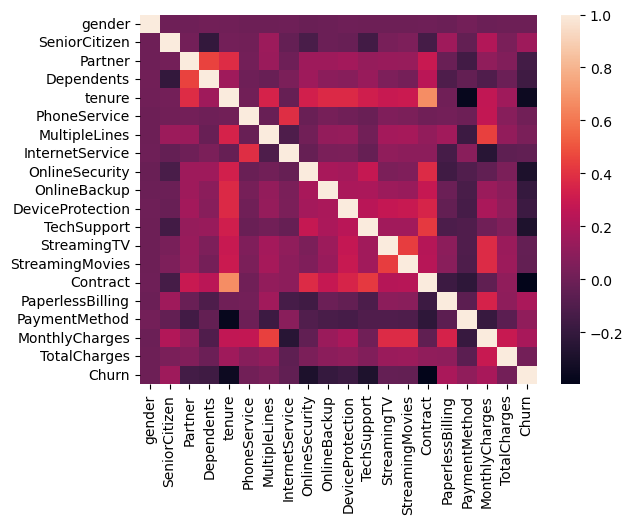

In [84]:
sns.heatmap(churn_df.corr())

## Split Data

### Independent/Dependent variables

In [85]:
# Split data into independent/dependent variables
X = churn_df.drop(columns=['Churn'], axis=1)
y = churn_df['Churn']

## Normalize Features with Continuous Values

In [86]:
# use StandardScaler to normalize tenure, MonthlyCharges, TotalCharges
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [87]:
# check X dataset to be sure features were scaled properly
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.131766,-0.398608
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.387740,-0.948762
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.517317,-1.641883
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.872611,-0.983710
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.095041,-1.235224


### Train / Test Sets

In [88]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [89]:
y_train.value_counts()

Churn
0    3876
1    1406
Name: count, dtype: int64

In [90]:
X.shape

(7043, 19)

## Modeling

In [91]:
# create model
model = Sequential()

### Add Layers

In [92]:
model.add(tf.layers.Dense(16, input_dim=19, activation='relu'))
model.add(tf.layers.Dense(32, activation='relu'))
model.add(tf.layers.Dense(1, activation='sigmoid'))

C:\Users\sharo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the Model

In [93]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5516 - loss: 0.7043 - val_accuracy: 0.7890 - val_loss: 0.4392
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7799 - loss: 0.4532 - val_accuracy: 0.8023 - val_loss: 0.4159
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.4373 - val_accuracy: 0.8004 - val_loss: 0.4117
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4270 - val_accuracy: 0.8023 - val_loss: 0.4108
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4379 - val_accuracy: 0.8042 - val_loss: 0.4110
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4336 - val_accuracy: 0.8070 - val_loss: 0.4092
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4242 - val_accuracy: 0.8079 - val_loss: 0.4083
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4006 - val_accuracy: 0.8098 - v

### Predict with Test Dataset

In [94]:
# get predictions
y_pred = model.predict(X_test)

# binary classification
y_pred_classes = (y_pred > 0.5).astype(int)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Evaluation

### Accuracy Score

In [95]:
accuracy = accuracy_score(y_test, y_pred_classes)
accuracy

0.7756956274843839

### Classification Report

In [96]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1298
           1       0.59      0.48      0.53       463

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761



### Confusion Matrix

In [97]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

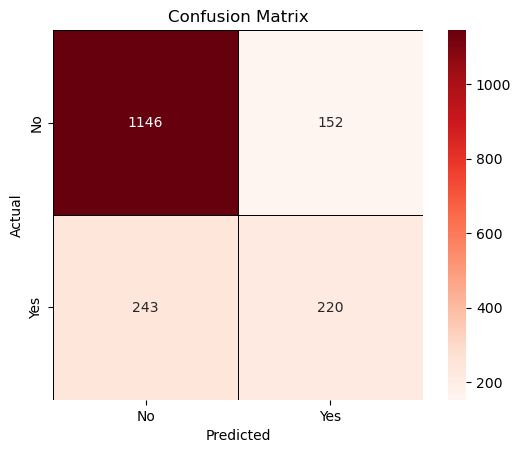

In [98]:
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds'
            , linecolor='black', linewidth=0.5 # differentiate between squares of similar color
            , xticklabels = ['No', 'Yes']
            , yticklabels = ['No', 'Yes']
            , square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

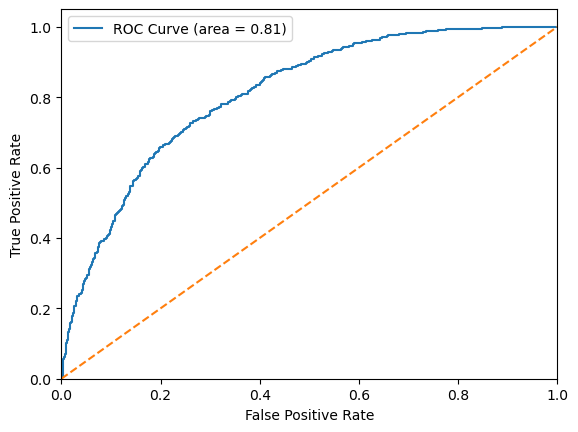

In [102]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim({0.0, 1.05})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()